In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy=True

In [41]:
con=sa.create_engine('sqlite:///../cas1/airbnb.db')

df=pd.read_sql('df_prep',con=con)

df

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,precio_m2,distrito,precio_total,ocupacion,m2,precio_compra,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,...,5098,Chamartín,60.0,50.684932,50,254900,1_Una,0_de uno a tres,1_Uno,3_De 18 a 744
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,...,2267,Latina,31.0,0.273973,50,113350,1_Una,0_de uno a tres,1_Uno,3_De 18 a 744
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,...,4085,Arganzuela,50.0,39.178082,90,367650,3_Tres,2_de cuatro a dieciseis,3_Tres_o_mas,1_De 0 a 1
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,...,4827,Centro,92.0,68.493151,50,241350,1_Una,0_de uno a tres,1_Uno,2_De 1 a 18
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,...,4085,Arganzuela,26.0,4.383562,50,204250,1_Una,0_de uno a tres,1_Uno,3_De 18 a 744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,17705,17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,...,4827,Centro,29.0,1.917808,50,241350,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1
17706,17706,17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,...,4827,Centro,29.0,1.917808,50,241350,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1
17707,17707,17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,...,4827,Centro,29.0,1.917808,50,241350,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1
17708,17708,17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,...,6114,Salamanca,29.0,1.917808,50,305700,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1


# 1. Información importante a tener en cuenta

## 1.1 ¿Cual es el ranking de distritos y barrios por precio medio de alquiler?

In [42]:
df.groupby('distrito').precio_total.mean().sort_values(ascending=False)



distrito
San Blas - Canillejas    476.085529
Villaverde               273.585271
Puente de Vallecas       197.607742
Vicálvaro                177.992982
Hortaleza                177.510169
Latina                   172.500879
Fuencarral - El Pardo    167.285660
Arganzuela               155.316418
Salamanca                153.622824
Barajas                  153.013380
Chamartín                147.826766
Tetuán                   143.666142
Moncloa - Aravaca        141.633469
Ciudad Lineal            137.717857
Chamberí                 133.883563
Centro                   132.797391
Retiro                   122.164401
Moratalaz                121.700000
Usera                    116.982833
Carabanchel               89.430981
Villa de Vallecas         84.942222
Name: precio_total, dtype: float64

Conclusión:

San Blas está muy lejos de los otros distritos. A continuación lo investigo:

In [43]:
df[df.distrito=='San Blas - Canillejas'].sort_values('precio_total',ascending=False)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,precio_m2,distrito,precio_total,ocupacion,m2,precio_compra,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc
9290,9290,9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,...,2591,San Blas - Canillejas,9800.0,100.000000,90,233190,3_Tres,2_de cuatro a dieciseis,3_Tres_o_mas,1_De 0 a 1
9662,9662,9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,...,2591,San Blas - Canillejas,6300.0,75.890411,70,181370,2_Dos,1_de tres a cuatro,3_Tres_o_mas,1_De 0 a 1
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,...,2591,San Blas - Canillejas,6000.0,0.000000,120,310920,4_Cuatro_o_mas,2_de cuatro a dieciseis,3_Tres_o_mas,1_De 0 a 1
9668,9668,9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,...,2591,San Blas - Canillejas,5670.0,100.000000,70,181370,2_Dos,2_de cuatro a dieciseis,3_Tres_o_mas,1_De 0 a 1
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,...,2591,San Blas - Canillejas,4480.0,75.890411,150,388650,4_Cuatro_o_mas,2_de cuatro a dieciseis,3_Tres_o_mas,1_De 0 a 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,3527,3527,16542257,Habitación para corta estancia. Wanda Metropol...,108860717,San Blas - Canillejas,Simancas,40.42960,-3.62345,Private room,...,2591,San Blas - Canillejas,20.0,100.000000,50,129550,1_Una,0_de uno a tres,1_Uno,3_De 18 a 744
10789,10789,10789,36305725,Lo mejor de Canillejas,273037515,San Blas - Canillejas,Canillejas,40.44752,-3.61102,Private room,...,2591,San Blas - Canillejas,20.0,100.000000,50,129550,1_Una,0_de uno a tres,1_Uno,2_De 1 a 18
10011,10011,10011,35039314,"Hab privad, IFEMA,Wanda,aeropuerto,metro al ce...",263951333,San Blas - Canillejas,Canillejas,40.44901,-3.60807,Private room,...,2591,San Blas - Canillejas,20.0,26.301370,50,129550,1_Una,0_de uno a tres,1_Uno,3_De 18 a 744
14671,14671,14671,45679625,Habitación individual disponible,179180085,San Blas - Canillejas,Amposta,40.42499,-3.62308,Private room,...,2591,San Blas - Canillejas,20.0,0.547945,50,129550,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1


### Insight 1
**Insight 1: existen inmuebles que pueden tener más valor en momentos determinados del año, ya sea en eventos deportivos y/o espectáculos**

¿Podría ser interesante crear un contrato de alquiler convencional con la condición de dejar libre el piso para las fechas de los eventos?

In [44]:
temp=df.groupby('distrito')[['precio_total','precio_compra']].median() #uso la mediana para evitar atípicos
temp

,precio_total,precio_compra
distrito,,
Arganzuela,58.0,204250.0
Barajas,49.5,170450.0
Carabanchel,48.0,106150.0
Centro,76.0,241350.0
Chamartín,74.0,254900.0
Chamberí,70.0,269050.0
Ciudad Lineal,50.0,147000.0
Fuencarral - El Pardo,60.0,178400.0
Hortaleza,69.0,193550.0


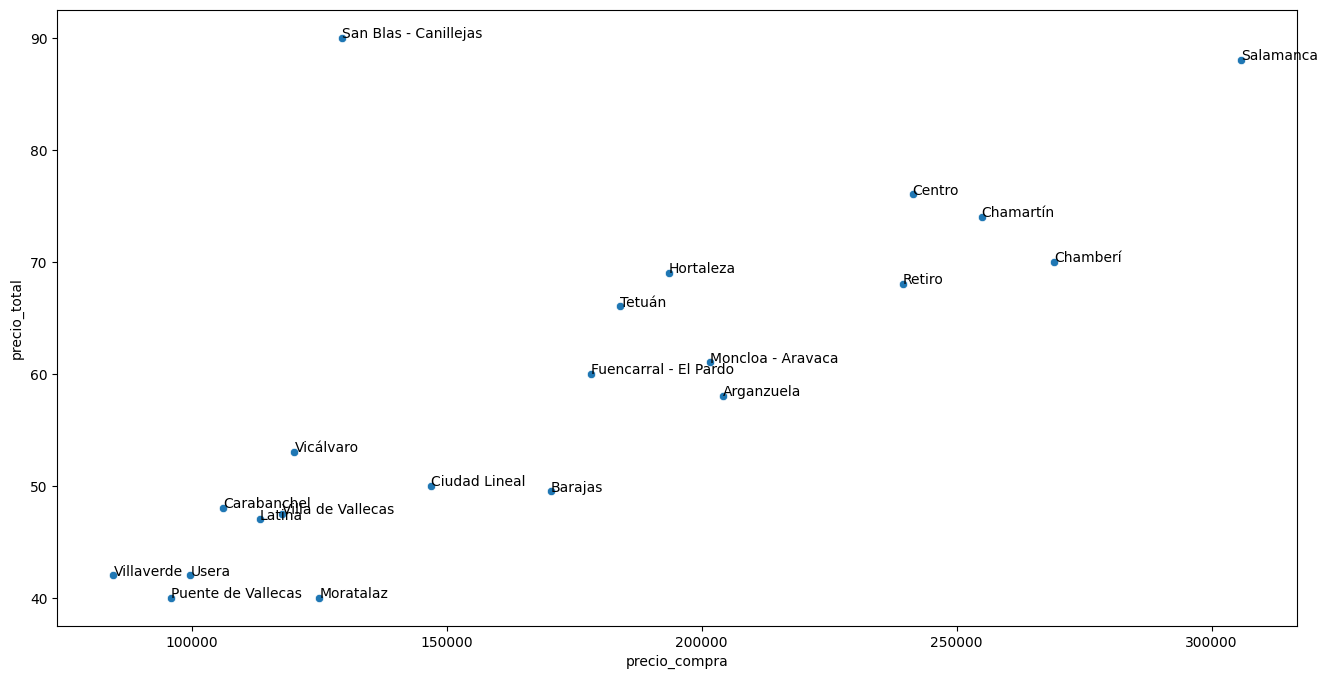

In [45]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=temp,x='precio_compra',y='precio_total')

for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

Conclusiones:

* Hay una relación bastante lineal. Cuando más inversión en la compra del piso mayor es el precio de alquiler. A excepción de el distrito de San-Blas que ya sabemos porque es.

Voy a realizar el mismo ejercicio pero a nivel de barrio:

In [46]:
temp2=df.groupby('neighbourhood')[['precio_compra','precio_total']].median()
temp2

,precio_compra,precio_total
neighbourhood,,
Abrantes,106150.0,35.5
Acacias,204250.0,53.8
Adelfas,335160.0,54.0
Aeropuerto,170450.0,41.3
Aguilas,113350.0,47.0
...,...,...
Valverde,178400.0,62.5
Ventas,147000.0,42.0
Vinateros,125000.0,50.0


C:\Users\Pere\AppData\Local\Temp\ipykernel_3900\3385440705.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp2.precio_compra[cad],temp2.precio_total[cad],temp2.index[cad]);


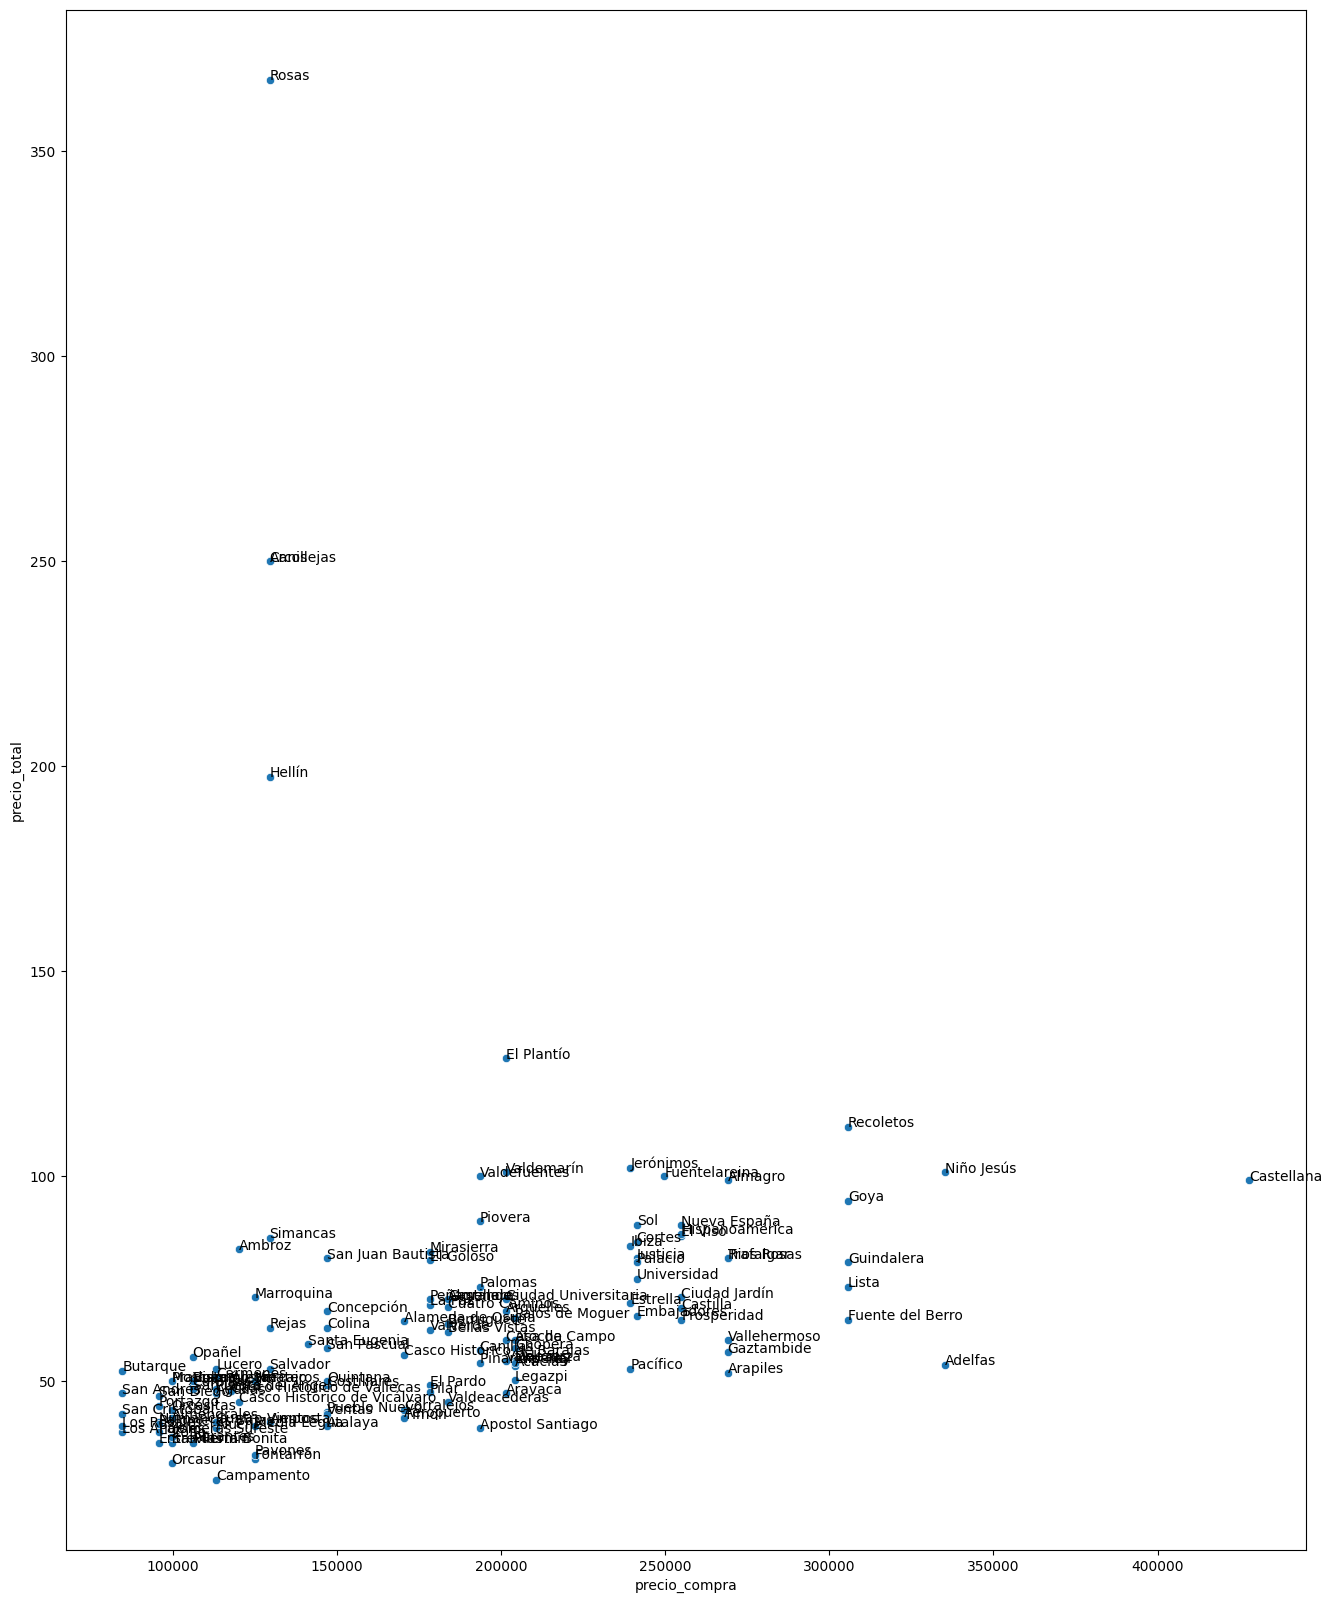

In [47]:
plt.figure(figsize=(16,20))
sns.scatterplot(temp2,x='precio_compra',y='precio_total')

for cad in range(0,temp2.shape[0]):
    plt.text(temp2.precio_compra[cad],temp2.precio_total[cad],temp2.index[cad]);

In [48]:
df.loc[(df.neighbourhood_group=='San Blas - Canillejas')].neighbourhood.unique()

array(['Rosas', 'Arcos', 'Rejas', 'Simancas', 'Salvador', 'Canillejas',
       'Hellín', 'Amposta'], dtype=object)

1. Vemos que Rosas, Arcos y Canillejas son barrios de San Blas - Canillejas. Ya sabemos porque son tan rentables.
2. Dentro de cada grupo de bajo-medio-alto se empezar a separarar a diferentes niveles:
    * Bajo: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Medio: Valdemarín, Valdefuentes
    * Medio-alto: Jerónimos, Fuentela reina
    * Alto: Recoletos, El platío
### Insight 2

**Insight 2: Existen ciertos barrios que pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que interese invertir**

## 1.2 Factores que influyen en el precio

Para obtener esta información vamos a realizar un minicubo:

In [49]:
metricas = ['precio_total','precio_compra']#variables a analizar
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']#variables que afectan a la metricas

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,precio_total,precio_compra
0,1_Una,0_de uno a tres,1_Uno,3_De 18 a 744,60.0,254900
1,1_Una,0_de uno a tres,1_Uno,3_De 18 a 744,31.0,113350
2,3_Tres,2_de cuatro a dieciseis,3_Tres_o_mas,1_De 0 a 1,50.0,367650
3,1_Una,0_de uno a tres,1_Uno,2_De 1 a 18,92.0,241350
4,1_Una,0_de uno a tres,1_Uno,3_De 18 a 744,26.0,204250
...,...,...,...,...,...,...
17705,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1,29.0,241350
17706,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1,29.0,241350
17707,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1,29.0,241350
17708,1_Una,0_de uno a tres,1_Uno,1_De 0 a 1,29.0,305700


In [50]:
minicubo_precio=minicubo_precio.melt(id_vars=metricas)
minicubo_precio

,precio_total,precio_compra,variable,value
0,60.0,254900,bedrooms_disc,1_Una
1,31.0,113350,bedrooms_disc,1_Una
2,50.0,367650,bedrooms_disc,3_Tres
3,92.0,241350,bedrooms_disc,1_Una
4,26.0,204250,bedrooms_disc,1_Una
...,...,...,...,...
70835,29.0,241350,number_of_reviews_disc,1_De 0 a 1
70836,29.0,241350,number_of_reviews_disc,1_De 0 a 1
70837,29.0,241350,number_of_reviews_disc,1_De 0 a 1
70838,29.0,305700,number_of_reviews_disc,1_De 0 a 1


In [51]:
minicubo_precio=minicubo_precio.groupby(['variable','value'])[metricas].agg('median')
minicubo_precio

precio_total  precio_compra
variable               value                                               
accommodates_disc      0_de uno a tres                  50.0       241350.0
                       1_de tres a cuatro               86.0       241350.0
                       2_de cuatro a dieciseis         126.0       337890.0
bedrooms_disc          1_Una                            56.0       241350.0
                       2_Dos                           100.0       337890.0
                       3_Tres                          140.0       434430.0
                       4_Cuatro_o_mas                  204.0       579240.0
beds_disc              1_Uno                            48.0       241350.0
                       2_Dos                            76.0       241350.0
                       3_Tres_o_mas                    118.0       337890.0
number_of_reviews_disc 1_De 0 a 1                       75.0       241350.0
                       2_De 1 a 18                      67.0       241350.0
                       3_De 18 a 744                    68.0       241350.0

### 1.2.1 Analisis accomodates_disc

In [52]:
minicubo_precio.loc['accommodates_disc']

,precio_total,precio_compra
value,,
0_de uno a tres,50.0,241350.0
1_de tres a cuatro,86.0,241350.0
2_de cuatro a dieciseis,126.0,337890.0


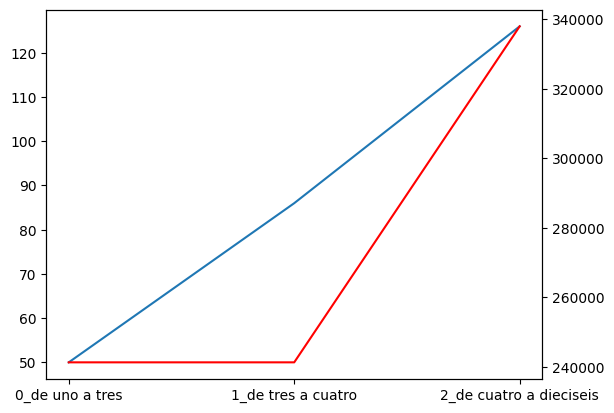

In [53]:
f,ax=plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2=ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color='red')


### Insight 3

**Insight 3: el número óptimo de huéspedes está entre 3 y 4, ya que el precio de los inmuebles para acomodares es el mismo que para acomodar 1 o 2. A partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante**

### 1.2.2 Analisi bedrooms_disc

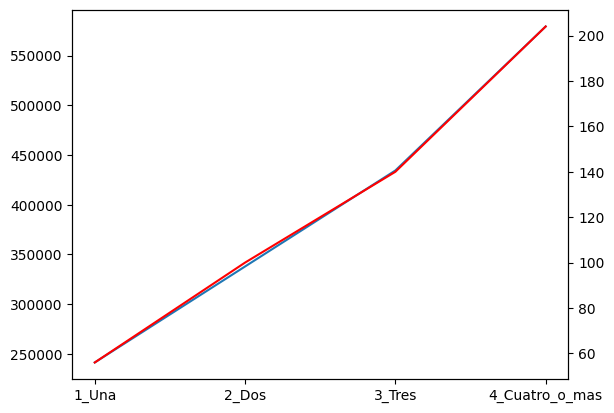

In [54]:
f,ax=plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra)
ax2=ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_total,color='red')

Existe una relación muy lineal, por lo tanto no puedo decir que una,dos,tres o cuatro habitaciones tenga una mejor relación compra/alquiler. 

Esto puede ser debido que he utilizado el numero de habbitaciones para calcular el precio total.


### 1.2.3 Analisis beds_disc

In [55]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
1_Uno,48.0,241350.0
2_Dos,76.0,241350.0
3_Tres_o_mas,118.0,337890.0


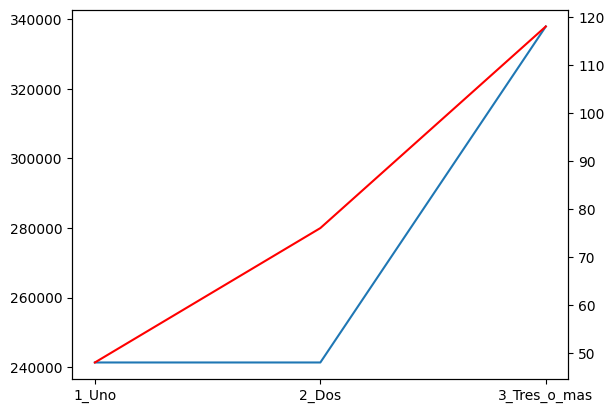

In [56]:
f,ax=plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_compra)
ax2=ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_total,color='red');

### Insight 4

**El numero de camas optimo son 2, ya que el precio de compra es el mismo que por 1 cama.**

Duda:

Meter el maximo numero de camas por habitación para maximizar los ingresos es posible?

<Axes: xlabel='beds'>

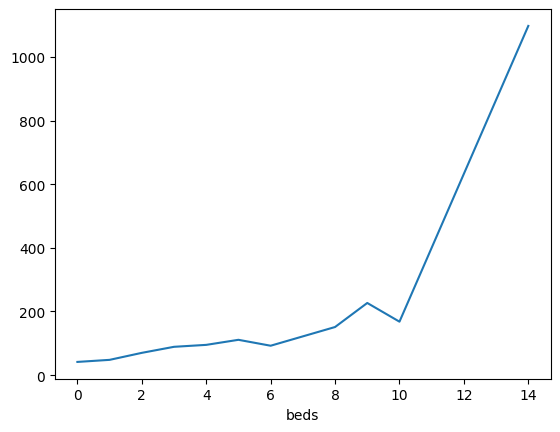

In [59]:
df[df.bedrooms==1].groupby('beds').precio_total.median().plot()

La duda se confirma: más camas en una habitación equivale a más precio de alquiler. Parece que la relación es exponencial.

### 1.2.4 Analisis number_of_reviews_disc

In [61]:
minicubo_precio.loc['number_of_reviews_disc']

,precio_total,precio_compra
value,,
1_De 0 a 1,75.0,241350.0
2_De 1 a 18,67.0,241350.0
3_De 18 a 744,68.0,241350.0


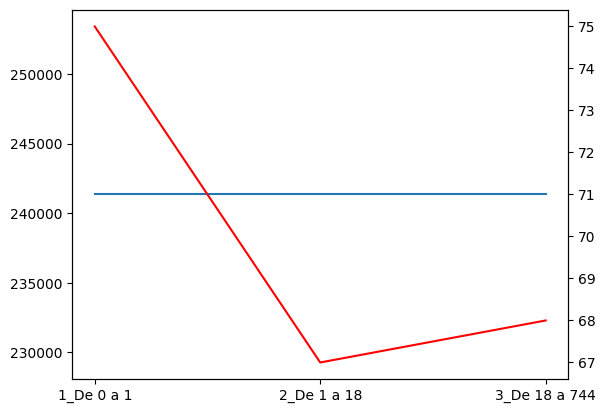

In [64]:
f,ax=plt.subplots()
ax.plot(minicubo_precio.loc['number_of_reviews_disc'].precio_compra)
ax2=ax.twinx()
ax2.plot(minicubo_precio.loc['number_of_reviews_disc'].precio_total,color='red')

Vemos 2 cosas:

1. El precio de compra es constante independientemente de las reseñas que tenga.
2. El precio de alquiler disminuye para los pisos con más reseñas.

No veo mucha logica en este analisis por lo que no se tendrá en cuenta.

### 1.2.5 Analisis ocupación

In [110]:
temp=df.groupby(['precio_total','precio_compra'],as_index=False)['ocupacion'].agg('median')
temp.set_index('ocupacion',inplace=True)
temp


,precio_total,precio_compra
ocupacion,,
40.821918,20.0,84650
53.972603,20.0,95900
64.657534,20.0,99750
81.369863,20.0,106150
50.958904,20.0,113350
...,...,...
30.684932,9999.0,285950
30.547945,9999.0,337890
20.273973,9999.0,367650


<Axes: xlabel='ocupacion', ylabel='precio_total'>

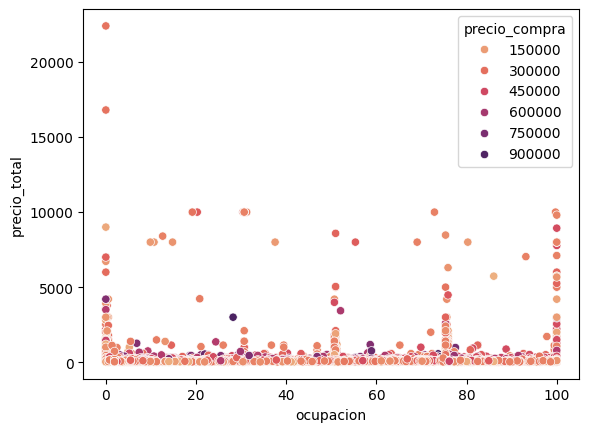

In [111]:
sns.scatterplot(data=df,x='ocupacion',y='precio_total',hue='precio_compra',palette='flare')

### Insight 5
**No parece que el precio de alquiler afecte a la ocupacion, ya que hay mucha dispersión de puntos**

**No parece que el precio de compra afecte a la ocupacion ya que los colores estan repartidos bastante uniformemente del 0 al 100% de ocupación.**

In [122]:
df[['distrito','precio_compra','precio_total','ocupacion']]

,distrito,precio_compra,precio_total,ocupacion
0,Chamartín,254900,60.0,50.684932
1,Latina,113350,31.0,0.273973
2,Arganzuela,367650,50.0,39.178082
3,Centro,241350,92.0,68.493151
4,Arganzuela,204250,26.0,4.383562
...,...,...,...,...
17705,Centro,241350,29.0,1.917808
17706,Centro,241350,29.0,1.917808
17707,Centro,241350,29.0,1.917808
17708,Salamanca,305700,29.0,1.917808


In [126]:
temp2=df.groupby('distrito')[['ocupacion','precio_total','precio_compra']].median()
temp2

,ocupacion,precio_total,precio_compra
distrito,,,
Arganzuela,76.164384,58.0,204250.0
Barajas,70.000000,49.5,170450.0
Carabanchel,64.657534,48.0,106150.0
Centro,66.849315,76.0,241350.0
Chamartín,60.410959,74.0,254900.0
Chamberí,74.794521,70.0,269050.0
Ciudad Lineal,75.342466,50.0,147000.0
Fuencarral - El Pardo,53.698630,60.0,178400.0
Hortaleza,64.109589,69.0,193550.0


C:\Users\Pere\AppData\Local\Temp\ipykernel_3900\1131623704.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp2.precio_total[cada],temp2.precio_compra[cada],temp2.index[cada])


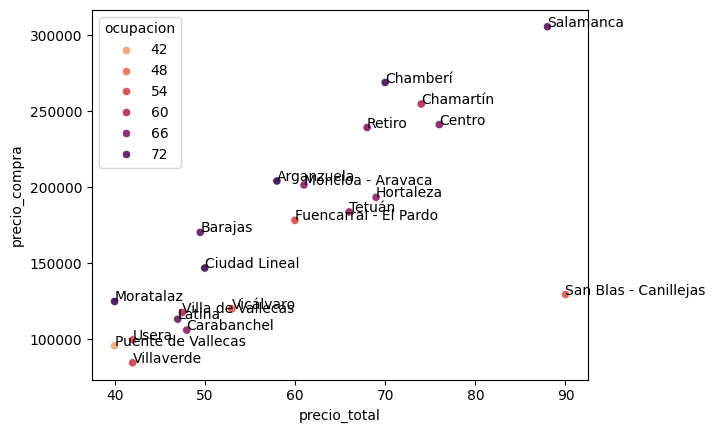

In [129]:
sns.scatterplot(data=temp2,x='precio_total',y='precio_compra',hue='ocupacion',palette='flare')

for cada in range(0,temp2.shape[0]):
    plt.text(temp2.precio_total[cada],temp2.precio_compra[cada],temp2.index[cada])

### Insight 6

Intereserá distritos con ocupaciones más alta posible para tener los máximos ingresos posibles.

Destaca:
* en la zona baja (bajo precio compra y bajo precio alquiler) y alta ocupación-> **Carabanchel y la Latina**
* Zona media (precio medio de compra y alquiler -> **Tetuán y Hortaleza**
* Zona alta (precio alto de compram y alquiler) -> **Centro**
* Zona especial(precio bajo de compra y alto de alquiler) -> **San Blas**

# 2. Conclusiones

Seguir estos pasos maximizará la rentabilidad:

* Tener en cuenta distritos que puedan acoger eventos deportivos y espectáculos.
* Barrios con buena relación precio alquiler/precio compra:
    + Bajo: Simancas, Ambroz, Marroquina, San Juan Bautista.
    + 
Medio: Valdemarín, Valdefuents.
    + 
Medio-alto: Jerónimos, Fuentela rei.n    + a
Alto: Recolets,El pla.
    
* Comprar piso que pueda acoger de 3 a 4 personas.
* Que tenga almenos 2 camas.
* Destaca:
* Carabanchel y la Latina
* Tetuán y Hortaleza
* Centro
* San Blastío